In [133]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
plt.style.use('seaborn-whitegrid')

In [149]:
# medidas inciales
H = 2
L = 3
w = 10

H_mm = H * 1000
L_mm = L * 1000

In [150]:
angulo = np.arctan(H / L)
angulo

0.5880026035475675

In [151]:
# reacciones
Ay = w * L / 2
Nby = Ay
Nb = Nby / np.cos(angulo)
Nbx = Nb * np.sin(angulo)
Ax = Nbx
Nby, Nbx,  Nb

(15.0, 9.999999999999998, 18.027756377319946)

In [152]:
E = 8 * 10 ** 9
area = np.pi * 0.1 ** 2
LONGITUD = np.sqrt(H ** 2 + L ** 2)

In [153]:
Uy = Nb * LONGITUD / (area * E * np.cos(angulo))

In [167]:
Uy_mm = Uy * 1000
# deformacion en metros
Uy 

3.108307085332485e-07

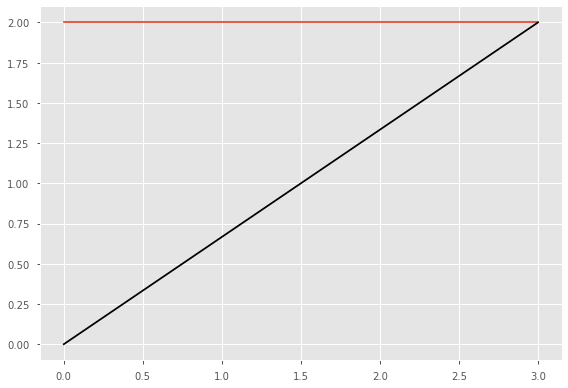

In [127]:
plt.style.use('seaborn-notebook')
plt.plot([0, L], [H, H])
plt.plot([0, L], [0, H], color='black')
plt.tight_layout()

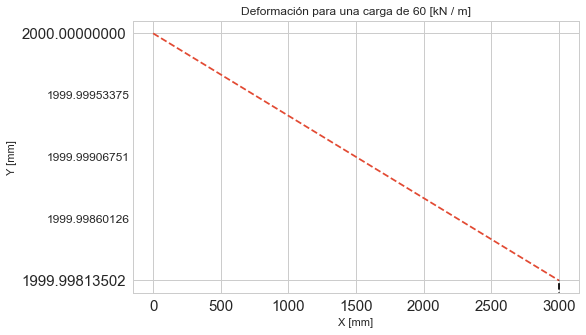

1999.9981350157489

In [174]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_yscale('log')

ax.plot([0, L * 1000], [H * 1000, H * 1000 - Uy * 1000], linestyle='--')
ax.plot([0, L * 1000], [0, H * 1000- Uy * 1000], linestyle='--', color='black')

# formatear números eje y
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(FormatStrFormatter("%.8f"))
ax.yaxis.set_minor_formatter(ScalarFormatter())
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.8f"))


ax.set_yticks([H_mm - Uy_mm, H_mm])
ax.set_yticks(np.arange(H_mm - Uy_mm, H_mm, Uy_mm / 4), minor=True)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=12)
#x.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
ax.set_xlabel('X [mm]')
ax.set_ylabel('Y [mm]')
ax.set_title(f"Deformación para una carga de {w} [kN / m]")

plt.show()
H_mm - Uy_mm

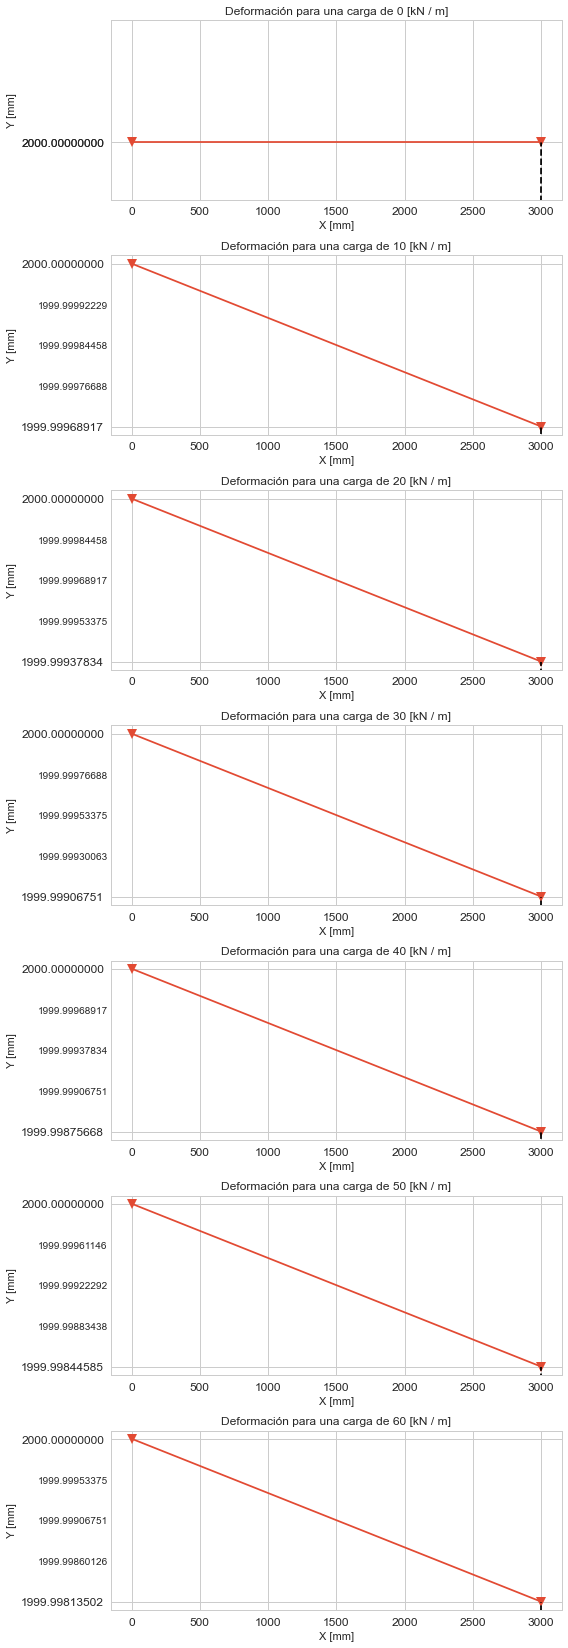

In [171]:
w_range = np.arange(0, 70, 10)
Uy_per_range = np.array([])
plt.rcParams["figure.figsize"] = (8, 23)
fig, axes = plt.subplots(nrows=7, ncols=1)
for w, ax in zip(w_range, axes):
    # calcular reacciones
    Ay = w * L / 2
    Nby = Ay
    Nb = Nby / np.cos(angulo)
    Nbx = Nb * np.sin(angulo)
    Ax = Nbx
    # calcular deformaciones
    Uy = Nb * LONGITUD / (area * E * np.cos(angulo))
    Uy_mm = Uy * 1000
    Uy_per_range = np.append(Uy_per_range, Uy_mm)
    
    # plotear en escala logaritmica
    ax.set_yscale('log')
    ax.plot([0, L_mm], [H_mm, H_mm - Uy_mm], marker='v', markersize=10)
    ax.plot([0, L_mm], [0, H_mm - Uy_mm], linestyle='--', color='black')
    # formatear etiquetas de los ejes
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.8f"))
    ax.yaxis.set_minor_formatter(ScalarFormatter())
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.8f"))
    # agregar numeros deseados   
    ax.set_yticks([H_mm - Uy_mm, H_mm])
    step = Uy_mm / 4 if Uy_mm else 0.0005
    ax.set_yticks(np.arange(H_mm - Uy_mm, H_mm, step), minor=True)
    # modificar tamaño de letras
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)
    # configuracion adicional
    ax.set_xlabel('X [mm]')
    ax.set_ylabel('Y [mm]')
    ax.set_title(f"Deformación para una carga de {w} [kN / m]")

    


plt.tight_layout()
plt.show()



In [13]:
def add_arrow(line, position=None, direction='right', size=50, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(color=color, width=0, headwidth=10),
        size=size
    )

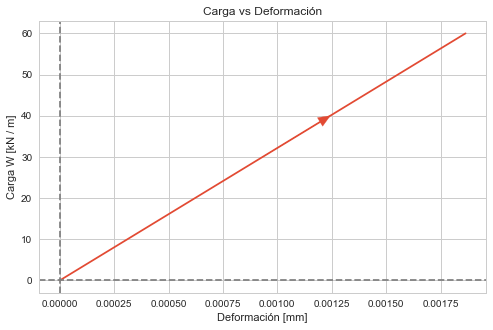

In [173]:
plt.rcParams["figure.figsize"] = (8, 5)
line = plt.plot(Uy_per_range, w_range)[0]
add_arrow(line)
# lineas de ejes
plt.axhline(color='gray', linestyle='--')
plt.axvline(color='gray', linestyle='--')
# etiquetas
plt.title('Carga vs Deformación')
plt.xlabel('Deformación [mm]')
plt.ylabel('Carga W [kN / m]')
plt.show()
